In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_equipment_data.csv')

# Display the first few rows of the dataset
print(df.head())

# Display dataset summary
print(df.info())
print(df.describe())


   EquipmentID                   Timestamp  Temperature   Pressure  Vibration  \
0            5  2024-01-12 22:34:33.880725    70.750382  73.210785   2.814068   
1            8  2024-03-01 22:34:33.880725   138.128078  76.860154   4.005306   
2           10  2021-12-28 22:34:33.880725   121.235433  67.256710   2.319925   
3            9  2023-01-08 22:34:33.880725   148.220108  73.513267   2.484427   
4            6  2021-10-10 22:34:33.880725    69.592306  73.819571   0.739983   

   MaintenanceHours  Failure  
0        426.073406        0  
1       1407.286281        0  
2       1383.074498        0  
3          5.317395        0  
4       1714.716987        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   EquipmentID       1000 non-null   int64  
 1   Timestamp         1000 non-null   object 
 2   Temperature       1000 non-nu

In [2]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Convert 'Timestamp' to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Drop 'Timestamp' if it's not needed for model training
df = df.drop(columns=['Timestamp'])

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Temperature', 'Pressure', 'Vibration', 'MaintenanceHours']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Encode categorical features (if any)
df = pd.get_dummies(df, columns=['EquipmentID'])

print(df.head())


EquipmentID         0
Timestamp           0
Temperature         0
Pressure            0
Vibration           0
MaintenanceHours    0
Failure             0
dtype: int64


C:\Users\Harsh\AppData\Local\Temp\ipykernel_7496\2465925525.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


   Temperature  Pressure  Vibration  MaintenanceHours  Failure  EquipmentID_1  \
0    -1.001887 -0.132151   0.050612         -0.949151        0          False   
1     1.314792  0.121769   0.970325          0.719741        0          False   
2     0.733964 -0.546430  -0.330898          0.678561        0          False   
3     1.661791 -0.111105  -0.203892         -1.664792        0          False   
4    -1.041706 -0.089792  -1.550715          1.242633        0          False   

   EquipmentID_2  EquipmentID_3  EquipmentID_4  EquipmentID_5  EquipmentID_6  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False           True   

   EquipmentID_7  EquipmentID_8 

In [3]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Failure', axis=1)
y = df['Failure']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(800, 14) (200, 14)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.705
Confusion Matrix:
 [[141   0]
 [ 59   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      1.00      0.83       141
           1       0.00      0.00      0.00        59

    accuracy                           0.70       200
   macro avg       0.35      0.50      0.41       200
weighted avg       0.50      0.70      0.58       200



C:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

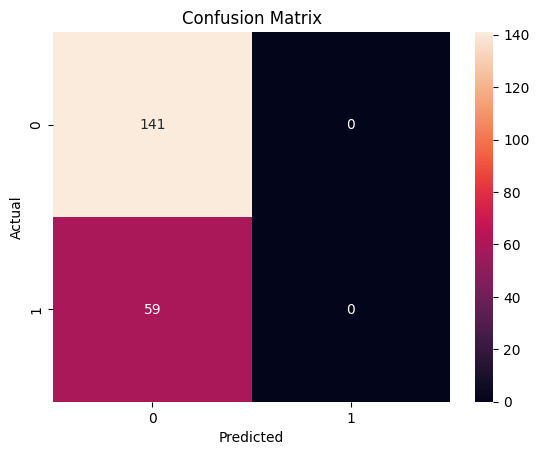

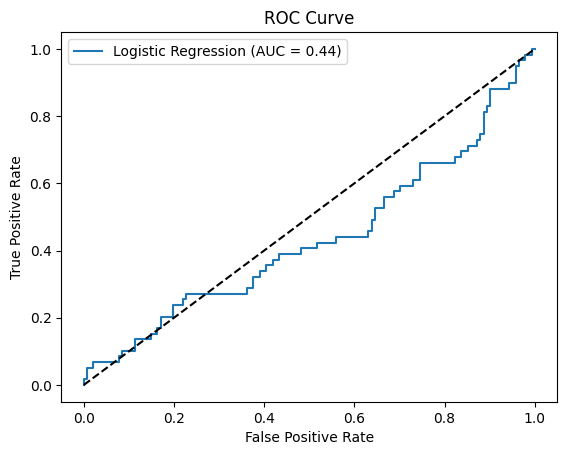

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.68
Confusion Matrix:
 [[131  10]
 [ 54   5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.80       141
           1       0.33      0.08      0.14        59

    accuracy                           0.68       200
   macro avg       0.52      0.51      0.47       200
weighted avg       0.60      0.68      0.61       200



In [7]:
# Example output after preprocessing
print(df.head())

# Example model evaluation output
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


   Temperature  Pressure  Vibration  MaintenanceHours  Failure  EquipmentID_1  \
0    -1.001887 -0.132151   0.050612         -0.949151        0          False   
1     1.314792  0.121769   0.970325          0.719741        0          False   
2     0.733964 -0.546430  -0.330898          0.678561        0          False   
3     1.661791 -0.111105  -0.203892         -1.664792        0          False   
4    -1.041706 -0.089792  -1.550715          1.242633        0          False   

   EquipmentID_2  EquipmentID_3  EquipmentID_4  EquipmentID_5  EquipmentID_6  \
0          False          False          False           True          False   
1          False          False          False          False          False   
2          False          False          False          False          False   
3          False          False          False          False          False   
4          False          False          False          False           True   

   EquipmentID_7  EquipmentID_8 

C:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Harsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic dataset for demonstration
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'predictive_maintenance_model.pkl')


['predictive_maintenance_model.pkl']